In [144]:
# project starts
print("NSU Fall2020 CSE445.2 Group-02")
# dataset link
project_link = "https://www.kaggle.com/arashnic/banking-loan-prediction"
print("link: ", project_link)

NSU Fall2020 CSE445.2 Group-02
link:  https://www.kaggle.com/arashnic/banking-loan-prediction


In [145]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [146]:
# load train_data
train_dataset_link = 'https://github.com/SabiqulHassan13/cse445.2-fall20-project-dataset/blob/main/train.csv?raw=true'
train_df = pd.read_csv(train_dataset_link)

In [147]:
train_df.shape

(69713, 22)

In [148]:
train_df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [149]:
train_df.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [150]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [151]:
# check null values
train_df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

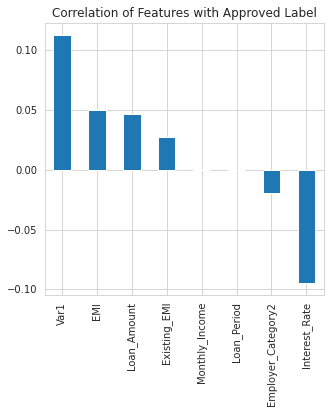

In [152]:
# Correlation of Approved label with all features

plt.figure(figsize=(5, 5))
plt.title("Correlation of Features with Approved Label")
train_df.corr()['Approved'].drop(index='Approved').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [153]:
# data preprocessing

In [154]:
# manual feature selection
# drop some features seems not related

features_to_drop = ['ID', 'DOB', 'Lead_Creation_Date', 'City_Code', 'Employer_Code', 'Customer_Existing_Primary_Bank_Code', 'Source']
train_df.drop(features_to_drop, axis=1, inplace=True)

In [155]:
train_df.head()

,Gender,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,Female,A,A,4.0,2000.0,P,N,G,0.0,NaN,NaN,NaN,NaN,0,0
1,Male,A,C,1.0,3500.0,P,Y,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,Male,C,C,4.0,2250.0,G,Y,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,Male,C,A,4.0,3500.0,G,Y,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,Male,A,A,4.0,10000.0,P,Y,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [156]:
print(train_df.columns)

used_features_len = len(train_df.columns)
print("total important features length: ", used_features_len)

Index(['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2',
       'Monthly_Income', 'Primary_Bank_Type', 'Contacted', 'Source_Category',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI',
       'Var1', 'Approved'],
      dtype='object')
total important features length:  15


In [157]:
# check unique value of categorical features

categorical_features = ['Gender', 'City_Category', 'Employer_Category1', 'Primary_Bank_Type', 'Contacted', 'Source_Category']

for item in categorical_features:
    print(train_df[item].unique())

['Female' 'Male']
['A' 'C' 'B' nan]
['A' 'C' 'B' nan]
['P' 'G' nan]
['N' 'Y']
['G' 'B' 'C' 'E' 'F' 'D' 'A']


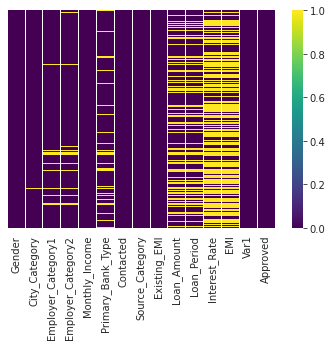

In [158]:
# visualize the missing data in train_dataset
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

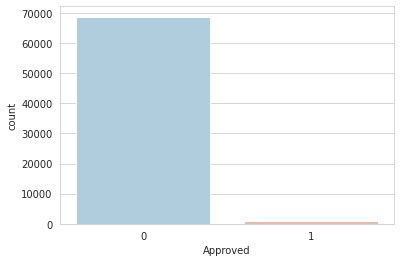

In [159]:
# see the comparison of loan approved on train_dataset
sns.set_style('whitegrid')
sns.countplot(x='Approved', data=train_df, palette='RdBu_r')

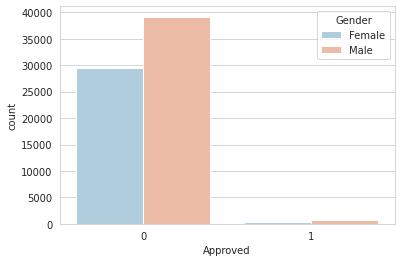

In [160]:
# observe loan approved by gender on train_dataset
sns.set_style('whitegrid')
sns.countplot(x='Approved', hue='Gender', data=train_df, palette='RdBu_r')

In [161]:
# categorical feature conversion
# applied one hot encoding

train_df = pd.get_dummies(train_df, drop_first=True)

In [162]:
train_df.head()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,4.0,2000.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.0,3500.0,0.0,20000.0,2.0,13.25,953.0,10,0,1,0,0,0,1,1,1,0,0,0,0,0,1
2,4.0,2250.0,0.0,45000.0,4.0,NaN,NaN,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0
3,4.0,3500.0,0.0,92000.0,5.0,NaN,NaN,7,0,1,0,1,0,0,0,1,1,0,0,0,0,0
4,4.0,10000.0,2500.0,50000.0,2.0,NaN,NaN,10,0,1,0,0,0,0,1,1,1,0,0,0,0,0


In [163]:
# check null values
train_df.isnull().sum()

Employer_Category2       4298
Monthly_Income              0
Existing_EMI               51
Loan_Amount             27709
Loan_Period             27709
Interest_Rate           47437
EMI                     47437
Var1                        0
Approved                    0
Gender_Male                 0
City_Category_B             0
City_Category_C             0
Employer_Category1_B        0
Employer_Category1_C        0
Primary_Bank_Type_P         0
Contacted_Y                 0
Source_Category_B           0
Source_Category_C           0
Source_Category_D           0
Source_Category_E           0
Source_Category_F           0
Source_Category_G           0
dtype: int64

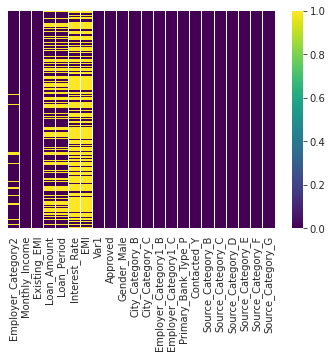

In [164]:
# visualize the missing data in train_dataset
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

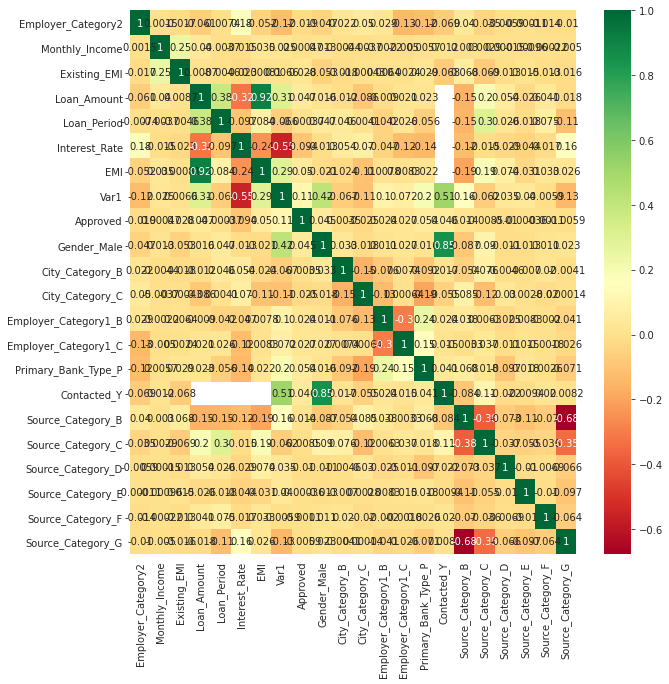

In [165]:
# find correlation matrix

# corr_mat = train_df.corr()
# top_corr_features = corr_mat.index
# plt.figure(figsize = (10, 10))
# sns.heatmap(train_df[top_corr_features].corr(), annot = True, cmap="RdYlGn")

corr_mat = train_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot = True, cmap="RdYlGn")

In [166]:
train_df.head()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,4.0,2000.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.0,3500.0,0.0,20000.0,2.0,13.25,953.0,10,0,1,0,0,0,1,1,1,0,0,0,0,0,1
2,4.0,2250.0,0.0,45000.0,4.0,NaN,NaN,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0
3,4.0,3500.0,0.0,92000.0,5.0,NaN,NaN,7,0,1,0,1,0,0,0,1,1,0,0,0,0,0
4,4.0,10000.0,2500.0,50000.0,2.0,NaN,NaN,10,0,1,0,0,0,0,1,1,1,0,0,0,0,0


In [167]:
# check missing value
train_df.isnull().sum()

Employer_Category2       4298
Monthly_Income              0
Existing_EMI               51
Loan_Amount             27709
Loan_Period             27709
Interest_Rate           47437
EMI                     47437
Var1                        0
Approved                    0
Gender_Male                 0
City_Category_B             0
City_Category_C             0
Employer_Category1_B        0
Employer_Category1_C        0
Primary_Bank_Type_P         0
Contacted_Y                 0
Source_Category_B           0
Source_Category_C           0
Source_Category_D           0
Source_Category_E           0
Source_Category_F           0
Source_Category_G           0
dtype: int64

In [168]:
train_df.columns

Index(['Employer_Category2', 'Monthly_Income', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved',
       'Gender_Male', 'City_Category_B', 'City_Category_C',
       'Employer_Category1_B', 'Employer_Category1_C', 'Primary_Bank_Type_P',
       'Contacted_Y', 'Source_Category_B', 'Source_Category_C',
       'Source_Category_D', 'Source_Category_E', 'Source_Category_F',
       'Source_Category_G'],
      dtype='object')

In [169]:
# fill up the missing value of features

features_to_fill = ['Employer_Category2', 'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI']

for item in features_to_fill:
#     print(item)
    median = train_df[item].median()
    train_df[item].fillna(median, inplace=True)    
#     mean = train_df[item].mean()
#     train_df[item].fillna(mean, inplace=True)

In [170]:
train_df.head()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,4.0,2000.0,0.0,30000.0,4.0,18.00,941.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.0,3500.0,0.0,20000.0,2.0,13.25,953.0,10,0,1,0,0,0,1,1,1,0,0,0,0,0,1
2,4.0,2250.0,0.0,45000.0,4.0,18.00,941.0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0
3,4.0,3500.0,0.0,92000.0,5.0,18.00,941.0,7,0,1,0,1,0,0,0,1,1,0,0,0,0,0
4,4.0,10000.0,2500.0,50000.0,2.0,18.00,941.0,10,0,1,0,0,0,0,1,1,1,0,0,0,0,0


In [171]:
# check missing value
train_df.isnull().sum()

Employer_Category2      0
Monthly_Income          0
Existing_EMI            0
Loan_Amount             0
Loan_Period             0
Interest_Rate           0
EMI                     0
Var1                    0
Approved                0
Gender_Male             0
City_Category_B         0
City_Category_C         0
Employer_Category1_B    0
Employer_Category1_C    0
Primary_Bank_Type_P     0
Contacted_Y             0
Source_Category_B       0
Source_Category_C       0
Source_Category_D       0
Source_Category_E       0
Source_Category_F       0
Source_Category_G       0
dtype: int64

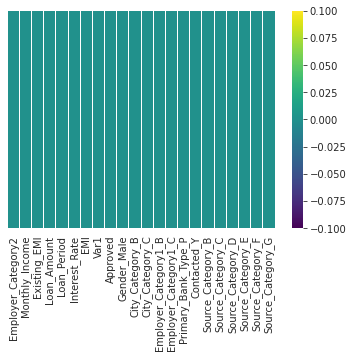

In [172]:
# visualize the missing data in train_dataset
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

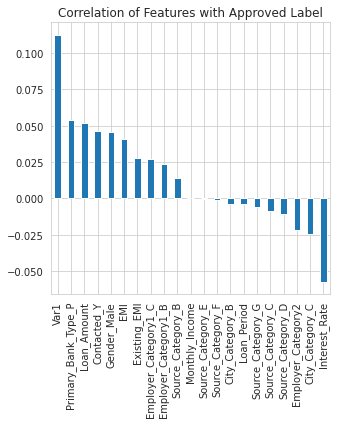

In [173]:
# Correlation of Approved label with all features

plt.figure(figsize=(5, 5))
plt.title("Correlation of Features with Approved Label")
train_df.corr()['Approved'].drop(index='Approved').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [174]:
# split train and test data
from sklearn.model_selection import train_test_split

X = train_df.drop(['Approved'], axis=1)
y = train_df['Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# observe splitted dataset
print("train_split: ", X_train.shape, y_train.shape)
print("test_split: ", X_test.shape, y_test.shape)

train_split:  (55770, 21) (55770,)
test_split:  (13943, 21) (13943,)


In [176]:
# all scores to compare later
all_scores = pd.DataFrame()

In [177]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# helper function
def model_predictions(name, model, X, y, title):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y, y_pred, average='binary')
    scores = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'])
    scores.loc[name] = [accuracy, precision, recall, f1]
    print('==================================================')
    print(title)
    print(scores)
    return scores

In [178]:
# train logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
# again confusion matrix
model_predictions('LOG-REG', log_reg, X_train, y_train, 'Logistic Regression Train-Set Scores')
log_reg_result = model_predictions('LOG-REG', log_reg, X_test, y_test, 'Logistic Regression Test-Set Scores')

all_scores = all_scores.append(log_reg_result)

Logistic Regression Train-Set Scores
         Accuracy  Precision  Recall   F1
LOG-REG  0.985297        0.0     0.0  0.0
Logistic Regression Test-Set Scores
         Accuracy  Precision    Recall        F1
LOG-REG  0.985226        0.5  0.004854  0.009615


In [180]:
# Decision Tree

In [181]:
# train Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [182]:
# again confusion matrix
model_predictions('DEC-TREE', dec_tree, X_train, y_train, 'Decision Tree Train-Set Scores')
dec_tree_result = model_predictions('DEC-TREE', dec_tree, X_test, y_test, 'Decision Tree Test-Set Scores')

all_scores = all_scores.append(dec_tree_result)

Decision Tree Train-Set Scores
          Accuracy  Precision    Recall       F1
DEC-TREE  0.998781        1.0  0.916462  0.95641
Decision Tree Test-Set Scores
          Accuracy  Precision    Recall        F1
DEC-TREE  0.971168   0.046296  0.048544  0.047393


In [183]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
# again confusion matrix
model_predictions('RFC', rfc, X_train, y_train, 'Random Forest Train-Set Scores')
rfc_result = model_predictions('RFC', rfc, X_test, y_test, 'Random Forest Test-Set Scores')

all_scores = all_scores.append(rfc_result)

Random Forest Train-Set Scores
     Accuracy  Precision    Recall        F1
RFC  0.998781   0.997333  0.918919  0.956522
Random Forest Test-Set Scores
     Accuracy  Precision    Recall        F1
RFC  0.984078   0.055556  0.004854  0.008929


In [185]:
#XGBoosts model

In [186]:
# train with XGBoost model
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [187]:
# again confusion matrix
model_predictions('XGBoosts', xgb, X_train, y_train, 'XGBoosts Train-Set Scores')
xgb_result = model_predictions('XGBoosts', xgb, X_test, y_test, 'XGBoosts Test-Set Scores')

all_scores = all_scores.append(xgb_result)

XGBoosts Train-Set Scores
          Accuracy  Precision    Recall        F1
XGBoosts  0.986014        1.0  0.041769  0.080189
XGBoosts Test-Set Scores
          Accuracy  Precision    Recall        F1
XGBoosts   0.98501   0.285714  0.009709  0.018779


In [188]:
# SVM

In [189]:
# train svm model
# from sklearn.svm import SVC

# svc = SVC(random_state=10, kernel="linear", C=0.3)

# from sklearn.svm import LinearSVC

# svc = LinearSVC() 
# svc = LinearSVC(C=1, loss="hinge", penalty='l2', max_iter=100)
# svc.fit(X_train, y_train)

In [190]:
# again confusion matrix
# svc_result = model_predictions('SVM', svc, X_test, y_test, 'SVM Test-Set Scores')

# all_scores = all_scores.append(svc_result)

In [191]:
# final result
all_scores.sort_values(by='F1', ascending=False)

,Accuracy,Precision,Recall,F1
DEC-TREE,0.971168,0.046296,0.048544,0.047393
XGBoosts,0.985010,0.285714,0.009709,0.018779
LOG-REG,0.985226,0.500000,0.004854,0.009615
RFC,0.984078,0.055556,0.004854,0.008929
